$\newcommand{\TirName}[1]{\text{#1}}
\newcommand{\inferrule}[3][]{
  \let\and\qquad
  \begin{array}{@{}l@{}}
  \TirName{#1}
  \\
  \displaystyle
  \frac{#2}{#3}
  \end{array}
}
\newcommand{\infer}[3][]{\inferrule[#1]{#2}{#3}}
$

# Meeting 20 - Encapsulating Effects

Bor-Yuh Evan Chang  
Thursday, October 31, 2024

<!-- 3 Expressions -->

<!-- 4 Binding and Scope -->

<!-- 8 Recursion -->

<!-- 9 Inductive Data Types -->

<!-- 11 Concrete Syntax -->

<!-- 12 Abstract Syntax and Parsing -->

<!-- 13 Exercise: Syntax -->

<!-- 14 Static Scoping -->

<!-- 15 Judgments -->

<!-- 16 Variables, Basic Values, and Judgments Lab -->

<!-- 18 Operational Semantics -->

<!-- 19 Functions and Dynamic Scoping -->

<!-- 20 Big-Step Exercise -->

<!-- 21 Evaluation Order  -->

<!-- Static Typing -->

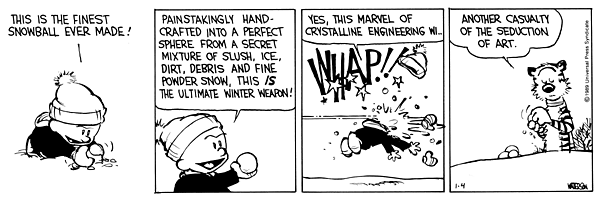

What questions does your neighbor have?

## Links

[ In-Class Slides](in-class/meeting19-encapsulating-effects.pdf)<br/> [
In-Class Jupyter](in-class/meeting19-encapsulating-effects.ipynb)<br/> [
Book
Chapter](https://csci3155.cs.colorado.edu/pppl-course/book/encapsulating-effects.html)

## Announcements

-   Lab Leaderboards Beta: Nastiness and Robustness competitions for
    extra credit
-   Review 3-4 today and tomorrow
    -   These are practice exams. We created lots of questions with
        explanations: ask about them in class, in office hours!
    -   Sign up on Canvas – needed to get assignment points
    -   Scored on the quality of your feedback for your partner, not how
        you were assessed by your partner
    -   Submit on Gradescope as a group — to get each other’s feedback
    -   **0 for no-shows**.
    -   Really sorry if your partner is a no-show in a self-guided
        session: write privately to CM Lawrence/Instructors on Piazza
        during your slot and don’t worry from a points standpoint.
-   Exam 3-4 next Tuesday 11/5
    -   ?? minutes in class (watch Piazza)
    -   accommodations (watch Piazza)

## Announcements

-   [Come see us to make a study
    plan](https://piazza.com/class/m090yd3cdrb1ti/post/415)
    -   e.g., via the redo policy
    -   grow before the final exam
-   Lab 1-3 Feedback Form
    -   See CM Lawrence today.
-   Lab Tests
    -   What an exercise should do is specified in the handout. Any
        given tests are some assistance.
    -   Drop two lab assignments.
-   Lab Submissions
    -   Must compile. Comment out temporary debugging things.
    -   Remember to submit on Gradescope (to upload from GitHub).

-   I apologize taking away from class time on Tuesday versus having a
    1-to-1 conversation.
-   Let me reiterate that the one thing I care about most is your growth
    as a computer scientist and a software engineer. I strive to meet
    you where you are —– regardless of whether you are approaching
    proficiency or exceeding —– and to help you grow from there.
-   Please come see us to help you create an individualized study plan
    (e.g., through redos or accelerated bonus projects).
-   We have a wealth of resources available to you, but I recognize that
    it is frustrating if you perhaps feel so far behind that you can’t
    follow the lectures or know where to even begin reading the
    textbook.
-   Engage with us sincerely, and we will do our very best to help you
    grow. It’s not too late.
-   I teach this course with this level of rigor and depth because I
    believe you are entitled to a world-class education that has a high
    ceiling to help you reach whatever career aspirations you have —
    whether it be going on to graduate school or becoming a Principal
    Software Engineer at a top-tier tech company.
-   I read every piece of feedback from you, and my door is always open
    for more feedback. I invite you to come meet with me to share your
    feedback. While it is not feasible for us to show how we address
    every piece of feedback, know that we continuously reflect and make
    adjustments. Also know that there are many competing constraints we
    have to consider, serving a large class and with a staff that is
    working extremely hard.
-   Again, come see us. We cannot help if we do not see you.

## Today

-   Triage Your Questions
    -   Static Type Checking?
    -   Higher-Order Functions?
    -   Review 3 on Semantics or Review 4 on Static Checking?
-   [Encapsulating
    Effects](https://csci3155.cs.colorado.edu/pppl-course/book/encapsulating-effects.html)

## Questions?

-   Review:
    -   What is static type checking and what is the benefit?

## Questions?

# Error Effects

## Exceptions

In [2]:
def toDoubleException(s: String): Double = s.toDouble

toDoubleException("1")
toDoubleException("4.2")

defined function toDoubleException 
 res0_1 : Double = 1.0 
 res0_2 : Double = 4.2

## Option

In [3]:
def toDoubleOption(s: String): Option[Double] = ???

defined function toDoubleOption

In [4]:
def toDoubleNoNaNOption(s: String): Option[Double] = ???

defined function toDoubleNoNaNOption

``` scala
def toDoubleOption(s: String): Option[Double] =
  try { Some(s.toDouble) } catch { case _: NumberFormatException => None }

toDoubleOption("1")
toDoubleOption("4.2")
toDoubleOption("hello")
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">toDoubleOption</span>
<span class="ansi-cyan-fg">res3_1</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-yellow-fg">Some</span>(value = <span class="ansi-green-fg">1.0</span>)
<span class="ansi-cyan-fg">res3_2</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-yellow-fg">Some</span>(value = <span class="ansi-green-fg">4.2</span>)
<span class="ansi-cyan-fg">res3_3</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span></pre>

``` scala
def toDoubleNoNaNOption(s: String): Option[Double] =
  // Do some work: trim the spaces from the end of s
  s.trim match {
    // Check for an error condition: if now the string is empty
    case s if s.length == 0 => None
    // Continue with some work: normalize to upper case
    case s => s.toUpperCase match {
      // Check for an error condition: the trimmed and upper-cased string is "NAN"
      case s if s == "NAN" => None
      // Continue with some work: convert to an Option[Double]
      case s => toDoubleOption(s)
    }
  }

toDoubleNoNaNOption("nan")
toDoubleNoNaNOption(" nan ")
toDoubleNoNaNOption("NaN")
toDoubleNoNaNOption(" NaN ")
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">toDoubleNoNaNOption</span>
<span class="ansi-cyan-fg">res4_1</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span>
<span class="ansi-cyan-fg">res4_2</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span>
<span class="ansi-cyan-fg">res4_3</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span>
<span class="ansi-cyan-fg">res4_4</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span></pre>

``` scala
def addToDoubleOption(s1: String, s2: String): Option[Double] =
  toDoubleNoNaNOption(s1) match {
    // If we get None, then we return None indicating error.
    case None => None
    // If we get Some, then we can continue to do work.
    case Some(d1) => toDoubleNoNaNOption(s2) match {
      // If we get None, then we return None indicating error.
      case None => None
      // If we get Some, then we can continue to do work.
      case Some(d2) => Some(d1 + d2)
    }
  }

addToDoubleOption("1", "4.2")
addToDoubleOption("1", "hello")
addToDoubleOption("1", " nan")
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">addToDoubleOption</span>
<span class="ansi-cyan-fg">res5_1</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-yellow-fg">Some</span>(value = <span class="ansi-green-fg">5.2</span>)
<span class="ansi-cyan-fg">res5_2</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span>
<span class="ansi-cyan-fg">res5_3</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span></pre>

## Option as a Collection

In [8]:
def toDoubleNoNaNOption(s: String): Option[Double] = ???

defined function toDoubleNoNaNOption

In [9]:
def addToDoubleOption(s1: String, s2: String): Option[Double] = ???

defined function addToDoubleOption

``` scala
def toDoubleNoNaNOption(s: String): Option[Double] =
  Some(s)
  // Do some work: trim the spaces from the end of s
  .map(_.trim)
  // Check for an error condition: if now the string is empty
  .filter(_.length != 0)
  // Continue with some work: normalize to upper case
  .map(_.toUpperCase)
  // Check for an error condition: the trimmed and upper-cased string is "NAN"
  .filter(_ != "NAN")
  // Continue with some work: convert to an Option[Double]
  .flatMap(toDoubleOption(_))
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">toDoubleNoNaNOption</span></pre>

``` scala
def addToDoubleOption(s1: String, s2: String): Option[Double] =
  toDoubleNoNaNOption(s1) flatMap { d1 =>
    // If we get Some, then we can continue to do work.
    toDoubleNoNaNOption(s2) map { d2 =>
      // If we get Some, then we can continue to do work.
      d1 + d2
    }
  }

addToDoubleOption("1", "4.2")
addToDoubleOption("1", "hello")
addToDoubleOption("1", " nan")
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">addToDoubleOption</span>
<span class="ansi-cyan-fg">res9_1</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-yellow-fg">Some</span>(value = <span class="ansi-green-fg">5.2</span>)
<span class="ansi-cyan-fg">res9_2</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span>
<span class="ansi-cyan-fg">res9_3</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span></pre>

## Map, Filter, FlatMap

<span class="theorem-title">**Exercise 1**</span> Implement `map` for
`Option[A]`s:

In [12]:
def map[A,B](opt: Option[A])(f: A => B): Option[B] = ???

defined function map

<span class="theorem-title">**Exercise 2**</span> Implement `filter` for
`Option[A]`s:

In [13]:
def filter[A](opt: Option[A])(f: A => Boolean): Option[A] = ???

defined function filter

<span class="theorem-title">**Exercise 3**</span> Implement `flatMap`
for `Option[A]`s:

In [14]:
def flatMap[A,B](opt: Option[A])(f: A => Option[B]): Option[B] = ???

defined function flatMap

## Comprehensions

In [15]:
def addToDoubleOption(s1: String, s2: String): Option[Double] = ???

defined function addToDoubleOption

``` scala
def addToDoubleOption(s1: String, s2: String): Option[Double] =
  for {
    d1 <- toDoubleNoNaNOption(s1)
    d2 <- toDoubleNoNaNOption(s2)
  } yield d1 + d2

addToDoubleOption("1", "4.2")
addToDoubleOption("1", "hello")
addToDoubleOption("1", " nan")
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">addToDoubleOption</span>
<span class="ansi-cyan-fg">res14_1</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-yellow-fg">Some</span>(value = <span class="ansi-green-fg">5.2</span>)
<span class="ansi-cyan-fg">res14_2</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span>
<span class="ansi-cyan-fg">res14_3</span>: <span class="ansi-green-fg">Option</span>[<span class="ansi-green-fg">Double</span>] = <span class="ansi-green-fg">None</span></pre>

## Either and Try

In [17]:
def toDoubleEither(s: String): Either[NumberFormatException, Double] = ???

def addToDoubleEither(s1: String, s2: String): Either[NumberFormatException, Double] =
  for {
    d1 <- toDoubleEither(s1)
    d2 <- toDoubleEither(s2)
  } yield d1 + d2

defined function toDoubleEither 
defined function addToDoubleEither

In [18]:
import scala.util.Try
def toDoubleTry(s: String): Try[Double] = ???

def addToDoubleTry(s1: String, s2: String): Try[Double] =
  for {
    d1 <- toDoubleTry(s1)
    d2 <- toDoubleTry(s2)
  } yield d1 + d2

import scala.util.Try
 defined function toDoubleTry 
defined function addToDoubleTry

``` scala
def toDoubleEither(s: String): Either[NumberFormatException, Double] =
  try { Right(s.toDouble) } catch { case e: NumberFormatException => Left(e) }
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">toDoubleEither</span></pre>

``` scala
import scala.util.Try
def toDoubleTry(s: String): Try[Double] =
  Try(s.toDouble)
```

<pre><span class="ansi-green-fg">import </span><span class="ansi-cyan-fg">scala.util.Try
</span>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">toDoubleTry</span></pre>

## Mutation Effects

In [21]:
def freshVarImperative: String = ???

defined function freshVarImperative

In [22]:
def freshVar: Int => (Int, String) = ???

defined function freshVar

``` scala
var counter: Int = 0
def freshVarImperative: String = {
  val x = s"x${counter}"
  counter += 1
  x
}

val x0 = freshVarImperative
val x1 = freshVarImperative
val x2 = freshVarImperative
```

<div class="jp-RenderedText">
<pre><code><span style="color: rgb(0, 187, 187)"><span class="ansi-cyan-fg">counter</span></span>: <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">Int</span></span> = <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">3</span></span>
defined <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">function</span></span> <span style="color: rgb(0, 187, 187)"><span class="ansi-cyan-fg">freshVarImperative</span></span>
<span style="color: rgb(0, 187, 187)"><span class="ansi-cyan-fg">x0</span></span>: <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">String</span></span> = <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">&quot;x0&quot;</span></span>
<span style="color: rgb(0, 187, 187)"><span class="ansi-cyan-fg">x1</span></span>: <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">String</span></span> = <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">&quot;x1&quot;</span></span>
<span style="color: rgb(0, 187, 187)"><span class="ansi-cyan-fg">x2</span></span>: <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">String</span></span> = <span style="color: rgb(0, 187, 0)"><span class="ansi-green-fg">&quot;x2&quot;</span></span></code></pre>
</div>

``` scala
val freshVar: Int => (Int, String) = { counter =>
  val x = s"x${counter}"
  (counter + 1, x)
}

val counter = 0
val (counter_, x0) = freshVar(counter)
val (counter__, x1) = freshVar(counter_)
val (counter___, x2) = freshVar(counter__)
```

<pre><span class="ansi-cyan-fg">freshVar</span>: <span class="ansi-green-fg">Int</span> =&gt; (<span class="ansi-green-fg">Int</span>, <span class="ansi-green-fg">String</span>) = ammonite.$sess.cmd22$Helper$$Lambda$2244/0x0000000800b87840@3d5721bd
<span class="ansi-cyan-fg">counter</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">0</span>
<span class="ansi-cyan-fg">counter_</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">1</span>
<span class="ansi-cyan-fg">x0</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x0"</span>
<span class="ansi-cyan-fg">counter__</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">2</span>
<span class="ansi-cyan-fg">x1</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x1"</span>
<span class="ansi-cyan-fg">counter___</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3</span>
<span class="ansi-cyan-fg">x2</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x2"</span></pre>

``` scala
val counter = 0
val (x0, x1, x2) = freshVar(counter) match {
  case (counter, x0) => freshVar(counter) match {
    case (counter, x1) => freshVar(counter) match {
      case (counter, x2) => (x0, x1, x2)
    }
  }
}
```

<pre><span class="ansi-cyan-fg">counter</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">0</span>
<span class="ansi-cyan-fg">x0</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x0"</span>
<span class="ansi-cyan-fg">x1</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x1"</span>
<span class="ansi-cyan-fg">x2</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x2"</span></pre>

## Encapsulating Mutation Effects

In [26]:
type DoWith[S, A] = S => (S, A)

defined type DoWith

In [27]:
freshVar: DoWith[Int, String]

res25 : Int => ( Int , String ) = ammonite.$sess.cmd22$Helper$$Lambda$2244/0x0000000800b87840@3d5721bd

In [28]:
def map[S,A,B](doer: DoWith[S,A])(f: A => B): DoWith[S,B] = ???

defined function map

In [29]:
def flatMap[S,A,B](doer: DoWith[S,A])(f: A => DoWith[S,B]): DoWith[S,B] = ???

defined function flatMap

In [30]:
val counter = 0

counter : Int = 0

``` scala
def map[S,A,B](doer: DoWith[S,A])(f: A => B): DoWith[S,B] = { (s: S) =>
  val (s_, a) = doer(s)
  (s_, f(a))
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">map</span></pre>

``` scala
def flatMap[S,A,B](doer: DoWith[S,A])(f: A => DoWith[S,B]): DoWith[S,B] = { (s: S) =>
  val (s_, a) = doer(s)
  f(a)(s_)
}
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">flatMap</span></pre>

``` scala
val counter = 0
val (counter___, (x0, x1, x2)) =
  (flatMap(freshVar) { x0 =>
    flatMap(freshVar) { x1 =>
      map(freshVar) { x2 =>
        (x0, x1, x2)
      }
    }
  })(counter)
```

<pre><span class="ansi-cyan-fg">counter</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">0</span>
<span class="ansi-cyan-fg">counter___</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3</span>
<span class="ansi-cyan-fg">x0</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x0"</span>
<span class="ansi-cyan-fg">x1</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x1"</span>
<span class="ansi-cyan-fg">x2</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x2"</span></pre>

## DoWith

In [34]:
sealed class DoWith[S,A] private (doer: S => (S, A)) {
  def map[B](f: A => B): DoWith[S,B] = new DoWith[S,B]({
    (s: S) => {
      val (s_, a) = doer(s)
      (s_, f(a))
    }
  })

  def flatMap[B](f: A => DoWith[S,B]): DoWith[S,B] = new DoWith[S,B]({
    (s: S) => {
      val (s_, a) = doer(s)
      f(a)(s_)
    }
  })

  def apply(s: S): (S, A) = doer(s)
}

object DoWith {
  def doget[S]: DoWith[S,S] = new DoWith[S,S]({ s => (s, s) })
  def doput[S](s: S): DoWith[S,Unit] = new DoWith[S,Unit]({ _ => (s, ()) })
  def doreturn[S,A](a: A): DoWith[S,A] = doget map { _ => a } 
  def domodify[S](f: S => S): DoWith[S,Unit] = doget flatMap { s => doput(f(s)) }
}

import DoWith._

defined class DoWith 
defined object DoWith 
 import DoWith._

In [35]:
def freshVar: DoWith[Int,String] = ???

defined function freshVar

In [36]:
val counter = 0

counter : Int = 0

``` scala
def freshVar: DoWith[Int,String] = doget flatMap { counter =>
  doput(counter + 1) map { _ => s"x${counter}" }
}

freshVar(0)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">freshVar</span>
<span class="ansi-cyan-fg">res35_1</span>: (<span class="ansi-green-fg">Int</span>, <span class="ansi-green-fg">String</span>) = (<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">"x0"</span>)</pre>

``` scala
def freshVar: DoWith[Int,String] =
  for {
    counter <- doget
    _ <- doput(counter + 1)
  } yield s"x${counter}"

freshVar(0)
```

<pre>defined <span class="ansi-green-fg">function</span> <span class="ansi-cyan-fg">freshVar</span>
<span class="ansi-cyan-fg">res36_1</span>: (<span class="ansi-green-fg">Int</span>, <span class="ansi-green-fg">String</span>) = (<span class="ansi-green-fg">1</span>, <span class="ansi-green-fg">"x0"</span>)</pre>

``` scala
val counter = 0
val (counter___, (x0, x1, x2)) =
  (freshVar flatMap { x0 =>
    freshVar flatMap { x1 =>
      freshVar map { x2 =>
        (x0, x1, x2)
      }
    }
  })(counter)
```

<pre><span class="ansi-cyan-fg">counter</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">0</span>
<span class="ansi-cyan-fg">counter___</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3</span>
<span class="ansi-cyan-fg">x0</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x0"</span>
<span class="ansi-cyan-fg">x1</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x1"</span>
<span class="ansi-cyan-fg">x2</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x2"</span></pre>

``` scala
val counter = 0
val (counter___, (x0, x1, x2)) =
  (for {
    x0 <- freshVar
    x1 <- freshVar
    x2 <- freshVar
  } yield (x0, x1, x2))(counter)
```

<pre><span class="ansi-cyan-fg">counter</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">0</span>
<span class="ansi-cyan-fg">counter___</span>: <span class="ansi-green-fg">Int</span> = <span class="ansi-green-fg">3</span>
<span class="ansi-cyan-fg">x0</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x0"</span>
<span class="ansi-cyan-fg">x1</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x1"</span>
<span class="ansi-cyan-fg">x2</span>: <span class="ansi-green-fg">String</span> = <span class="ansi-green-fg">"x2"</span></pre>